# NAME : GIRI RAJU R
# FIELD :  DATA SCIENCE AND BUSINESS ANALYTICS

## _**GRIPDEC'21**_

#  _NUMERICAL AND SENTIMENTAL ANALYSIS OF THE STOCK AND ITS PRICE PREDICTION_

### Numerical Data : TCS share price.
### Textual Data             : india-news-headlines.

### _Link for the datasets : [https://drive.google.com/drive/folders/19yuWzgIfFLdUyUf0I0uiPXVXuDSH7Ju4?usp=sharing]

### **Importing the necessary libraries to perform the analysis**

In [1]:


import pandas as pd # DATA MANIPULATION AND HANDLING OF DATA
import numpy as np  # TO PERFORM OPERATIONS ON ARRAYS 
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## _Exploratory Data  Analysis_ 

In [239]:
# Loading Data and viewing the first 10 entries in the dataset
num_df = pd.read_csv('tcs_share.csv')
num_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0
5,2002-08-19,36.674999,36.674999,35.137501,35.474998,26.377609,205880.0
6,2002-08-20,35.724998,38.724998,35.487499,36.462502,27.111877,3773624.0
7,2002-08-21,38.474998,39.200001,36.525002,38.250000,28.440964,3011064.0
8,2002-08-22,39.512501,41.575001,39.312500,39.900002,29.667849,6732480.0
9,2002-08-23,40.250000,43.625000,39.762501,42.299999,31.452364,4841672.0


In [240]:
num_df.rename(columns = {'Date': 'date'}, inplace = True)
num_df

,date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0
...,...,...,...,...,...,...,...
4717,2021-07-26,3200.000000,3224.250000,3190.850098,3197.550049,3197.550049,1259611.0
4718,2021-07-27,3200.000000,3210.000000,3161.149902,3182.949951,3182.949951,1121367.0
4719,2021-07-28,3188.000000,3204.449951,3132.399902,3197.800049,3197.800049,1660654.0
4720,2021-07-29,3200.250000,3225.449951,3190.300049,3195.800049,3195.800049,1731997.0


In [241]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       4722 non-null   object 
 1   Open       4706 non-null   float64
 2   High       4706 non-null   float64
 3   Low        4706 non-null   float64
 4   Close      4706 non-null   float64
 5   Adj Close  4706 non-null   float64
 6   Volume     4706 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.4+ KB


#### _converting the datatype of the 'Date' from object to datetime and making it as index column_

In [252]:
num_df['date'] = pd.to_datetime(num_df.date)


In [253]:
num_df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,4706.000000,4706.000000,4706.000000,4706.000000,4706.000000,4.706000e+03
mean,869.772376,879.570766,859.259192,869.242680,790.874070,3.332748e+06
std,799.362863,807.227765,790.734294,798.726417,787.106534,3.295359e+06
min,32.474998,36.450001,32.474998,35.474998,26.377609,0.000000e+00
25%,213.031250,217.487503,208.790619,212.393749,163.314842,1.685234e+06
50%,588.000000,595.049988,582.212494,589.324982,485.010086,2.639108e+06
75%,1273.500000,1284.149963,1259.437500,1272.793793,1139.389130,4.158834e+06
max,3391.500000,3399.649902,3350.000000,3380.800049,3373.437988,8.806715e+07


In [254]:
print(f'The shape of data {num_df.shape}')

The shape of data (4722, 7)


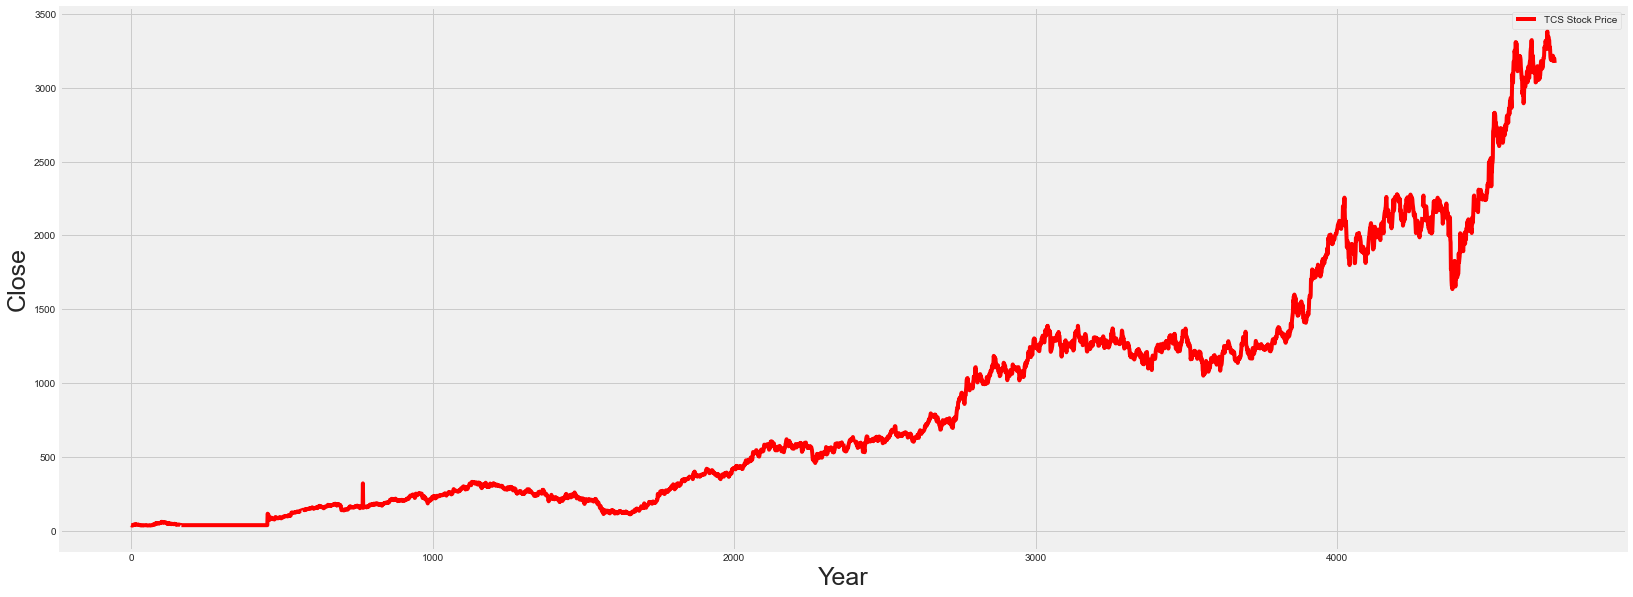

In [10]:
fig = plt.figure(figsize = (25, 10))
plt.plot(num_df.index,num_df.Close, color = 'red', label = 'TCS Stock Price')
plt.xlabel('Year', fontsize= 25)
plt.ylabel('Close', fontsize = 25)
plt.legend()
plt.show()

## _News headlines dataset for sentimental Analysis of the stock_

In [248]:

news_df = pd.read_csv('india-news-headlines.csv')

In [249]:
#looking into the dataset
news_df.head(20)
news_df.shape

(3424067, 3)

In [256]:
news_df.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [257]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [258]:
news_df.rename(columns = {'publish_date':'date', 'headline_category': 'category', 'headline_text': 'news'}, inplace = True)

In [259]:
news_df

,date,category,news
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [261]:
# dropping the unnecessary values
news_df.drop(0, inplace = True)
news_df.drop('category', axis = 1, inplace = True)


In [262]:
#converting the int type of date to datetime object
news_df['date'] = pd.to_datetime(news_df['date'], format = '%Y%m%d')
news_df

,date,news
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
5,2001-01-02,Dilute the power of transfers; says Riberio
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [263]:

news_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424066 entries, 1 to 3424066
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   news    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 78.4+ MB


In [20]:
# grouping the news column according to the date
news_df['news'] = news_df.groupby(['date']).transform(lambda x : ' '.join(x)) 
news_df = news_df.drop_duplicates() 
news_df.reset_index(inplace = True, drop = True)
news_df

,date,news
0,2001-01-02,Fissures in Hurriyat over Pak visit America's ...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [21]:
# finding the polarity and the subjectivity of the news texts
polarity = []
subjectivity = []
for idx, row in news_df.iterrows():
    polarity.append(TextBlob(row['news']).sentiment[0])
    subjectivity.append(TextBlob(row['news']).sentiment[1])

In [22]:
columns = list(news_df.columns)
news_df.sort_values(by = columns, inplace = True, ignore_index = True)

<ipython-input-22-a8f976241665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.sort_values(by = columns, inplace = True, ignore_index = True)


In [23]:
news_df['subjectivity'] = subjectivity
news_df['polarity'] = polarity

<ipython-input-23-498607294a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['subjectivity'] = subjectivity
<ipython-input-23-498607294a28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['polarity'] = polarity


In [24]:
news_df

,date,news,subjectivity,polarity
0,2001-01-02,Fissures in Hurriyat over Pak visit America's ...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


In [26]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['news']]
news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['news']]
news_df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news_df['news']]
news_df['Positive'] = [sia.polarity_scores(v)['pos'] for v in news_df['news']]
news_df

<ipython-input-26-a8b0ab43f0af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['Compound'] = [sia.polarity_scores(v)['compound'] for v in news_df['news']]
<ipython-input-26-a8b0ab43f0af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['Negative'] = [sia.polarity_scores(v)['neg'] for v in news_df['news']]
<ipython-input-26-a8b0ab43f0af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,date,news,subjectivity,polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Fissures in Hurriyat over Pak visit America's ...,0.282333,0.151333,-0.9822,0.125,0.806,0.069
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [27]:
news_df.drop_duplicates(keep = 'last', inplace = True, ignore_index = True)

<ipython-input-27-6ee4073e242f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.drop_duplicates(keep = 'last', inplace = True, ignore_index = True)


In [28]:
news_df.duplicated().sum()

0

In [37]:
news_df

,date,news,subjectivity,polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Fissures in Hurriyat over Pak visit America's ...,0.282333,0.151333,-0.9822,0.125,0.806,0.069
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886,-0.9997,0.129,0.793,0.078
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
7259,2020-12-29,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


## **_Merging the numerical and textual Dataframe into a single merged dataframe_**

In [264]:
merged_df = pd.merge(num_df, news_df, how = 'inner' , on = 'date')

In [232]:
merged_df

,date,Open,High,Low,Close,Adj Close,Volume,news,subjectivity,polarity,Compound,Negative,Neutral,Positive
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0,PM announces Rs 10 lakh each for hockey player...,0.422355,0.053614,-0.9963,0.148,0.733,0.120
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0,Jharkhand hockey players battle poor infrastru...,0.334639,0.055231,-0.9994,0.162,0.746,0.092
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0,Golden girls rode on their confidence Tirkey t...,0.477370,0.151738,-0.9731,0.120,0.771,0.109
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0,Vaishali admn stops salary of engineers Drug t...,0.398681,0.067345,-0.9190,0.129,0.741,0.130
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0,LU circular restricts entry of vehicles I am a...,0.457219,0.149289,0.3379,0.097,0.802,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,2883.396729,1807144.0,How to set the mood for sex during cold winter...,0.390942,0.048166,-0.9989,0.094,0.838,0.067
4575,2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2903.267578,2108994.0,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
4576,2020-12-29,2920.000000,2952.000000,2920.000000,2930.500000,2904.357666,1994151.0,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
4577,2020-12-30,2934.399902,2947.699951,2902.000000,2909.300049,2883.346924,2637968.0,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [238]:
print(merged_df.columns)

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'news',
       'subjectivity', 'polarity', 'Compound', 'Negative', 'Neutral',
       'Positive'],
      dtype='object')


In [233]:
merged_df.isnull().values.ravel().sum()

96

In [234]:
sum([True for idx,row in merged_df.iterrows() if any(row.isnull())])

16

In [236]:
merged_df.fillna(method = 'ffill', inplace = True)
merged_df

,date,Open,High,Low,Close,Adj Close,Volume,news,subjectivity,polarity,Compound,Negative,Neutral,Positive
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0,PM announces Rs 10 lakh each for hockey player...,0.422355,0.053614,-0.9963,0.148,0.733,0.120
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0,Jharkhand hockey players battle poor infrastru...,0.334639,0.055231,-0.9994,0.162,0.746,0.092
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0,Golden girls rode on their confidence Tirkey t...,0.477370,0.151738,-0.9731,0.120,0.771,0.109
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0,Vaishali admn stops salary of engineers Drug t...,0.398681,0.067345,-0.9190,0.129,0.741,0.130
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0,LU circular restricts entry of vehicles I am a...,0.457219,0.149289,0.3379,0.097,0.802,0.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,2883.396729,1807144.0,How to set the mood for sex during cold winter...,0.390942,0.048166,-0.9989,0.094,0.838,0.067
4575,2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2903.267578,2108994.0,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517,-0.9998,0.138,0.768,0.093
4576,2020-12-29,2920.000000,2952.000000,2920.000000,2930.500000,2904.357666,1994151.0,Man recovers charred remains of 'thief' from h...,0.424021,0.061210,-0.9999,0.150,0.754,0.096
4577,2020-12-30,2934.399902,2947.699951,2902.000000,2909.300049,2883.346924,2637968.0,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496,-0.9999,0.144,0.775,0.081


In [237]:
merged_df.isnull().values.ravel().sum()

0

In [217]:

# 80% will be used for traning, and 20% for testing

train_size = 0.8        # 80%
split_index = int(train_size * merged_df.shape[0])

factors_column = ['Open', 'High', 'Low', 'Close', 'Volume','subjectivity', 'polarity','Compound', 'Negative','Neutral','Positive']
y_col_index = 3 # Close

train_set = merged_df[factors_column].values[:split_index]
test_set = merged_df[factors_column].values[split_index:]

In [246]:
split_index

3663

In [218]:
# scale our price from 0 to 1

sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.fit_transform(test_set)

In [219]:
train_set_scaled[0]

array([0.00459044, 0.00256614, 0.00467806, 0.00312379, 0.00405498,
       0.52515132, 0.44807927, 0.00185   , 0.33482143, 0.52920962,
       0.43147208])

In [220]:
# this function will combine data of 60 days (we can change it using time_window parameter) 

def generate_data(series, y_col_index, time_window):
    X = []
    y = []
    for i in range(time_window, len(series)):
        X.append(series[i-time_window: i])
        y.append(series[i, y_col_index])
    return (np.array(X), np.array(y))

In [221]:
window = 60
X_train, y_train = generate_data(train_set_scaled, y_col_index=y_col_index,time_window = window)
X_test, y_test = generate_data(test_set_scaled, y_col_index=y_col_index,time_window =  window )

## _Importing the libraries required to perform stacked lstm to predict the price of the stock_

In [205]:
import tensorflow
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [222]:
model = Sequential()


#return_sequence=True, it will return something with shape
#unit means the dimension of the inner cells in LSTM.

model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 5))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [223]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 60, 50)            12400     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 60, 30)            9720      
_________________________________________________________________
dropout_31 (Dropout)         (None, 60, 30)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 60, 10)            1640      
_________________________________________________________________
dropout_32 (Dropout)         (None, 60, 10)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 5)               

In [224]:
optimizer = Adam(learning_rate = 0.01)

In [225]:
model.compile(optimizer = optimizer, loss = 'mean_squared_error')
model.fit(X_train ,
              y_train,
              epochs = 10, 
              batch_size = 64)
    

Epoch 1/10
57/57 [==============================] - 21s 167ms/step - loss: 0.0556
Epoch 2/10
57/57 [==============================] - 10s 177ms/step - loss: 0.0091
Epoch 3/10
57/57 [==============================] - 10s 177ms/step - loss: 0.0069
Epoch 4/10
57/57 [==============================] - 10s 177ms/step - loss: 0.00682
Epoch 5/10
57/57 [==============================] - 10s 177ms/step - loss: 0.0061
Epoch 6/10
57/57 [==============================] - 7s 126ms/step - loss: 0.0066
Epoch 7/10
57/57 [==============================] - 6s 104ms/step - loss: 0.0068
Epoch 8/10
57/57 [==============================] - 9s 150ms/step - loss: 0.0061
Epoch 9/10
57/57 [==============================] - 8s 138ms/step - loss: 0.0061
Epoch 10/10
57/57 [==============================] - 7s 114ms/step - loss: 0.0061


In [226]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[y_col_index]) + sc.data_min_[y_col_index]

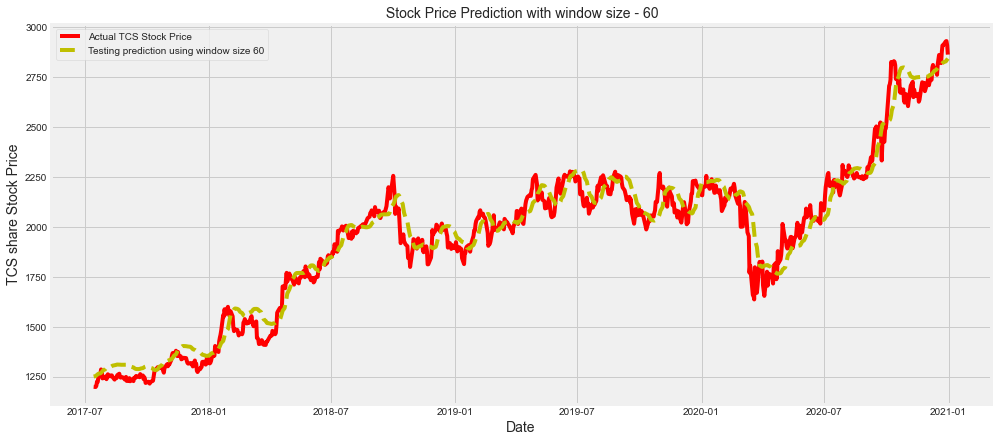

In [227]:
fig = plt.figure(figsize = (15, 7))


plt.plot(merged_df.date.values[ split_index+60 : ], merged_df.Close.values[ split_index+60: ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(merged_df['date'].values[split_index+60 : ], test_prediction, 'y--', label = 'Testing prediction using window size 60')
plt.title(' Stock Price Prediction with window size - 60',fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('TCS share Stock Price', fontsize = 14)
plt.legend()

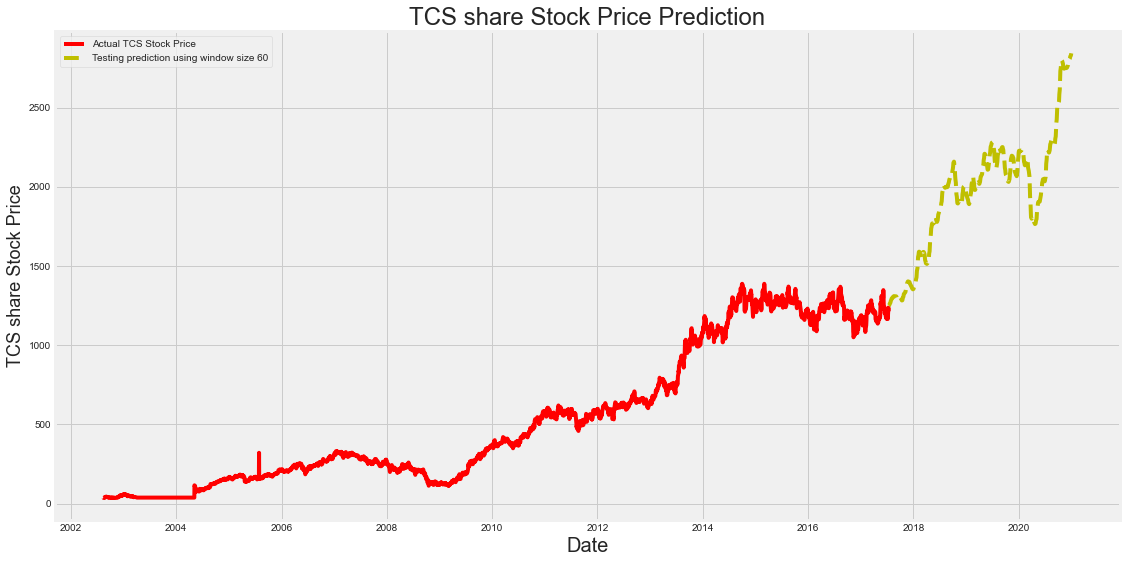

In [245]:
fig = plt.figure(figsize = (17,9))



plt.plot(merged_df.date.values[ :split_index+60  ], merged_df.Close.values[ :split_index+60 ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(merged_df['date'].values[split_index+60 : ], test_prediction, 'y--', label = 'Testing prediction using window size 60')
plt.title('TCS share Stock Price Prediction',fontsize = 24)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('TCS share Stock Price',fontsize = 18)
plt.legend()

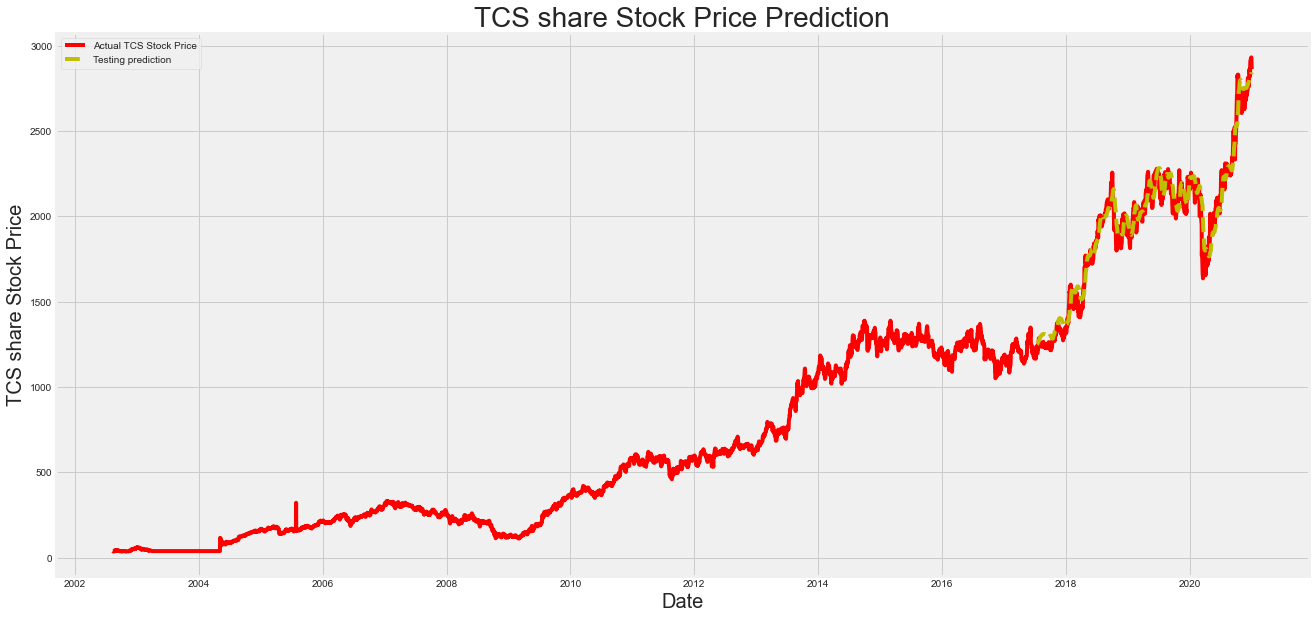

In [230]:
fig = plt.figure(figsize = (20,10))

# WINDOW SIZE 60
plt.plot(merged_df.date, merged_df.Close, 'r-', label = 'Actual TCS Stock Price',)
plt.plot(merged_df['date'].values[split_index+60 : ], test_prediction, 'y--', label = 'Testing prediction')
plt.title('TCS share Stock Price Prediction',fontsize = 28)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('TCS share Stock Price', fontsize = 20)
plt.legend()